# Example using real information taken for the web of the oficial Spanish Institute of Statistics (INE) about population

Data taken from __Instituto Nacional de Estadística__ : [INE](https://www.ine.es/)

![logoINE](http://localhost:8888/files/Documents/Python%20Scripts/logoINE.gif?_xsrf=2%7C70ecda57%7C3d43952d16045c41e05dcaf0f9039344%7C1689617336)

First, we have to import the libraries and packages we will need for this task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import copy

Now we import the csv file that contains the information we will use

In [2]:
df_population_spain_evolution: pd.DataFrame = pd.read_csv("pob_provincias.csv")

Let's print the dataframe to check the information it contains

In [3]:
print(df_population_spain_evolution)

                          Año        2021        2020        2019        2018  \
0                       Total  47.385.107  47.450.795  47.026.208  46.722.980   
1                 02 Albacete     386.464     388.270     388.167     388.786   
2         03 Alicante/Alacant   1.881.762   1.879.888   1.858.683   1.838.819   
3                  04 Almería     731.792     727.945     716.820     709.340   
4              01 Araba/Álava     333.626     333.940     331.549     328.868   
5                 33 Asturias   1.011.792   1.018.784   1.022.800   1.028.244   
6                    05 Ávila     158.421     157.664     157.640     158.498   
7                  06 Badajoz     669.943     672.137     673.559     676.376   
8                  07 Balears   1.173.008   1.171.543   1.149.460   1.128.908   
9                08 Barcelona   5.714.730   5.743.402   5.664.579   5.609.350   
10                 48 Bizkaia   1.154.334   1.159.443   1.152.651   1.149.628   
11                  09 Burgo

###### We have to filter the dataframe to keep only the series with the time series about the population in the province in Seville

### We need to perform the following transformations in the dataframe in order to be able to use it
1. We make the field Año (Year) the index of the dataframe
2. Our matrix is transposed
3. Its index is reset

In [4]:
df_population_spain_evolution = df_population_spain_evolution.set_index("Año")
df_population_spain_evolution = df_population_spain_evolution.transpose()
df_population_spain_evolution = df_population_spain_evolution.reset_index(names=["Año"])

4. Now we iterate through the data frame in order to
+ Remove all "." from the population figures (as it breaks conversion to integer)
- Fill all empty values with NA
* Convert every value to integer (replacing NA by 0)

In [5]:
for column in df_population_spain_evolution:
    df_population_spain_evolution[column] = \
        df_population_spain_evolution[column].str.replace(".", "")
    df_population_spain_evolution[column] = \
        df_population_spain_evolution[column].fillna(0)
    df_population_spain_evolution[column] = \
        df_population_spain_evolution[column].replace(r'^\s*$', np.nan,
                                                      regex=True)
    df_population_spain_evolution[column] = \
        df_population_spain_evolution[column].fillna(0).astype(int)

C:\Users\ingov\AppData\Local\Temp\ipykernel_14544\2481303716.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_population_spain_evolution[column].str.replace(".", "")


In [6]:
df_population_seville_evolution: pd.DataFrame = \
    df_population_spain_evolution[["Año", "41 Sevilla"]]
print(df_population_seville_evolution)

Año   Año  41 Sevilla
0    2021     1947852
1    2020     1950219
2    2019     1942389
3    2018     1939887
4    2017     1939527
5    2016     1939775
6    2015     1941480
7    2014     1941355
8    2013     1942155
9    2012     1938974
10   2011     1928962
11   2010     1917097
12   2009     1900224
13   2008     1875462
14   2007     1849268
15   2006     1835077
16   2005     1813908
17   2004     1792420
18   2003     1782862
19   2002     1758720
20   2001     1747441
21   2000     1734917
22   1999     1725482
23   1998     1714845
24   1997           0
25   1996     1705320


###### Now we get the population in the province of Malaga

In [7]:
df_population_malaga_evolution: pd.DataFrame = \
    df_population_spain_evolution[["Año", "29 Málaga"]]
print(df_population_malaga_evolution)

Año   Año  29 Málaga
0    2021    1695651
1    2020    1685920
2    2019    1661785
3    2018    1641121
4    2017    1630615
5    2016    1629298
6    2015    1628973
7    2014    1621968
8    2013    1652999
9    2012    1641098
10   2011    1625827
11   2010    1609557
12   2009    1593068
13   2008    1563261
14   2007    1517523
15   2006    1491287
16   2005    1453409
17   2004    1397925
18   2003    1374890
19   2002    1330010
20   2001    1302240
21   2000    1278851
22   1999    1258084
23   1998    1240580
24   1997          0
25   1996    1249290


###### We extract the variable Año (Years) from the dataframe as we will use it as axis x in our chart

In [8]:
years_list: list = list(df_population_spain_evolution["Año"].to_list())[::-1]
print(years_list)

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


#### Let't transform our data so we can use it to build our chart easily

###### First we need to extract the series that contains the population in Seville and turn it into a list in chronological order (from less to more recent)

In [9]:
seville_population_list: list = \
    list(df_population_seville_evolution["41 Sevilla"].to_list())[::-1]
print(seville_population_list)

[1705320, 0, 1714845, 1725482, 1734917, 1747441, 1758720, 1782862, 1792420, 1813908, 1835077, 1849268, 1875462, 1900224, 1917097, 1928962, 1938974, 1942155, 1941355, 1941480, 1939775, 1939527, 1939887, 1942389, 1950219, 1947852]


###### Now we have to do the same for the series that contains the population in the province of Malaga

In [10]:
malaga_population_list: list = \
    list(df_population_malaga_evolution["29 Málaga"].to_list())[::-1]
print(malaga_population_list)

[1249290, 0, 1240580, 1258084, 1278851, 1302240, 1330010, 1374890, 1397925, 1453409, 1491287, 1517523, 1563261, 1593068, 1609557, 1625827, 1641098, 1652999, 1621968, 1628973, 1629298, 1630615, 1641121, 1661785, 1685920, 1695651]


###### To make it easier, we build a dictionary so we can go through each pair of series of values ea
###### key: [population, bar_colour]

In [11]:
bar_information: dict = {"Sevilla": [seville_population_list, "#D73333"],
                         "Málaga": [malaga_population_list, "#336CD7"]}

###### We need to perform a series of transformations to set the different groups of bars

In [12]:
x = np.arange(len(years_list))
width: float = 0.5
i: int = 0

##### Now we build the object subplot that we will use to add the bars in our plot

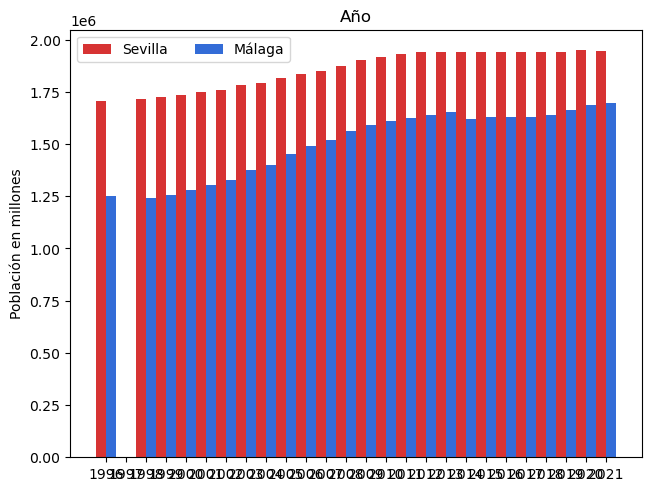

In [13]:
fig, ax = plt.subplots(layout='constrained')

# Iteramos sobre el objeto que contiene la información que queremos representar
for city, info in bar_information.items():
    offset = width * i
    # Añadimos uno a uno los grupos/series de barras (cada ciudad)
    rects = ax.bar(x + offset, info[0], width, label=city, color=info[1])
    #ax.bar_label(rects, padding=3)
    i += 1
ax.set_ylabel('Población en millones')
ax.set_title('Año')
ax.set_xticks(x + width/2, years_list)
ax.legend(loc='upper left', ncols=2)

plt.show()

## Evolution of the population in the provinces of Seville and Malaga

### Which was the year with the highest population in the series in Seville? (1996-2021)

In [14]:
max_population_seville: float = max(df_population_seville_evolution["41 Sevilla"])
max_population_seville_year: int = \
    df_population_seville_evolution[
        (df_population_seville_evolution["41 Sevilla"] ==
         max_population_seville)]["Año"].iloc[0]
print("Population: {0}".format(max_population_seville))
print("Year: {0}".format(max_population_seville_year))

Population: 1950219
Year: 2020


### What was the highest difference between consecutive years in the population in Seville? Between which years?

In [15]:
seville_population_differences: dict = {}
for i in range(0, len(df_population_seville_evolution)-1):
    # print(df_population_seville_evolution.loc[i])
    # print(df_population_seville_evolution.loc[i+1])
    pop_recent_year: int = df_population_seville_evolution.loc[i]["41 Sevilla"]
    pop_older_year: int = df_population_seville_evolution.loc[i+1]["41 Sevilla"]
    if pop_older_year == 0 or pop_recent_year == 0:
        pass
    else:
        recent_year: int = df_population_seville_evolution.loc[i]["Año"]
        older_year: int = df_population_seville_evolution.loc[i+1]["Año"]
        anual_difference: int = pop_recent_year - pop_older_year
        seville_population_differences[anual_difference] = (recent_year, older_year)

In [16]:
print(seville_population_differences)

{-2367: (2021, 2020), 7830: (2020, 2019), 2502: (2019, 2018), 360: (2018, 2017), -248: (2017, 2016), -1705: (2016, 2015), 125: (2015, 2014), -800: (2014, 2013), 3181: (2013, 2012), 10012: (2012, 2011), 11865: (2011, 2010), 16873: (2010, 2009), 24762: (2009, 2008), 26194: (2008, 2007), 14191: (2007, 2006), 21169: (2006, 2005), 21488: (2005, 2004), 9558: (2004, 2003), 24142: (2003, 2002), 11279: (2002, 2001), 12524: (2001, 2000), 9435: (2000, 1999), 10637: (1999, 1998)}


#### Highest **growth**

In [17]:
max_addition = max(seville_population_differences.keys())

In [18]:
print("Highest growth was between the years {0}".format(seville_population_differences[max_addition]))
print("Population grew in {0} inhabitants".format(max_addition))

Highest growth was between the years (2008, 2007)
Population grew in 26194 inhabitants


 #### Highest **drop**

In [19]:
max_substraction = min(seville_population_differences.keys())

In [20]:
print("Highest drop was between the years {0}".format(seville_population_differences[max_substraction]))
print("Population dropped in {0} inhabitants".format(max_substraction))

Highest drop was between the years (2021, 2020)
Population dropped in -2367 inhabitants


|Year Range|Difference|
|----------|---------|
|2020-2021|-2367 inhabitants|
|2007-2008|26194 inhabitants|

In [21]:
year_variation: [] = [x[0] for x in seville_population_differences.values()][::-1]
print(year_variation)

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [22]:
population_variation: [] = list(seville_population_differences.keys())[::-1]

In [23]:
print(population_variation)

[10637, 9435, 12524, 11279, 24142, 9558, 21488, 21169, 14191, 26194, 24762, 16873, 11865, 10012, 3181, -800, 125, -1705, -248, 360, 2502, 7830, -2367]


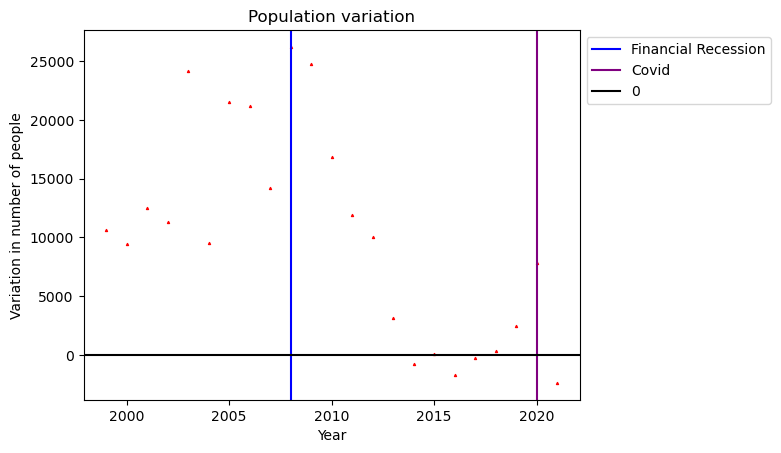

In [24]:
plt.scatter(year_variation, population_variation, s=2, marker='^', c='red')
plt.axvline(x = 2008, color = 'b', label = 'Financial Recession')
plt.axvline(x = 2020, color = 'Purple', label = 'Covid')
plt.axhline(y = 0, color = 'Black', linestyle = '-', label = "0")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
plt.ylabel('Variation in number of people')
plt.xlabel("Year")
plt.title("Population variation")
plt.show()

#### Population variation in the province of Seville

### Where did the population drop the most between 2020 and 2021? (COVID)

First step will be to get the population between 2020 and 2021 in every province (the pandemic started in 2020)

In [25]:
df_population_spain_covid = df_population_spain_evolution[df_population_spain_evolution["Año"].isin([2020, 2021])]

In [26]:
print(df_population_spain_covid)

Año   Año     Total  02 Albacete  03 Alicante/Alacant  04 Almería  \
0    2021  47385107       386464              1881762      731792   
1    2020  47450795       388270              1879888      727945   

Año  01 Araba/Álava  33 Asturias  05 Ávila  06 Badajoz  07 Balears  ...  \
0            333626      1011792    158421      669943     1173008  ...   
1            333940      1018784    157664      672137     1171543  ...   

Año  42 Soria  43 Tarragona  44 Teruel  45 Toledo  46 Valencia/València  \
0       88747        822309     134545     709403               2589312   
1       88884        816772     134176     703772               2591875   

Año  47 Valladolid  49 Zamora  50 Zaragoza  51 Ceuta  52 Melilla  
0           519361     168725       967452     83517       86261  
1           520649     170588       972528     84202       87076  

[2 rows x 54 columns]


Now let's transform the data. First, let's get a list that contains only the names of every province and will be used as the columns in a new dataframe. We will fill the dataframe with the population variation between 2020 and 2021

In [27]:
provinces = list(df_population_spain_covid.columns)
del provinces[0]
del provinces[0]
print(provinces)

['02 Albacete', '03 Alicante/Alacant', '04 Almería', '01 Araba/Álava', '33 Asturias', '05 Ávila', '06 Badajoz', '07 Balears', '08 Barcelona', '48 Bizkaia', '09 Burgos', '10 Cáceres', '11 Cádiz', '39 Cantabria', '12 Castellón/Castelló', '13 Ciudad Real', '14 Córdoba', '15 Coruña', '16 Cuenca', '20 Gipuzkoa', '17 Girona', '18 Granada', '19 Guadalajara', '21 Huelva', '22 Huesca', '23 Jaén', '24 León', '25 Lleida', '27 Lugo', '28 Madrid', '29 Málaga', '30 Murcia', '31 Navarra', '32 Ourense', '34 Palencia', '35 Palmas', '36 Pontevedra', '26 Rioja', '37 Salamanca', '38 Santa Cruz de Tenerife', '40 Segovia', '41 Sevilla', '42 Soria', '43 Tarragona', '44 Teruel', '45 Toledo', '46 Valencia/València', '47 Valladolid', '49 Zamora', '50 Zaragoza', '51 Ceuta', '52 Melilla']


We create an empty dataframe where the columns are the Spanish provinces. We will fill each one with the population variation between 2020 and 2021

In [28]:
df_population_diff = pd.DataFrame(columns = provinces)
print(df_population_diff)

Empty DataFrame
Columns: [02 Albacete, 03 Alicante/Alacant, 04 Almería, 01 Araba/Álava, 33 Asturias, 05 Ávila, 06 Badajoz, 07 Balears, 08 Barcelona, 48 Bizkaia, 09 Burgos, 10 Cáceres, 11 Cádiz, 39 Cantabria, 12 Castellón/Castelló, 13 Ciudad Real, 14 Córdoba, 15 Coruña, 16 Cuenca, 20 Gipuzkoa, 17 Girona, 18 Granada, 19 Guadalajara, 21 Huelva, 22 Huesca, 23 Jaén, 24 León, 25 Lleida, 27 Lugo, 28 Madrid, 29 Málaga, 30 Murcia, 31 Navarra, 32 Ourense, 34 Palencia, 35 Palmas, 36 Pontevedra, 26 Rioja, 37 Salamanca, 38 Santa Cruz de Tenerife, 40 Segovia, 41 Sevilla, 42 Soria, 43 Tarragona, 44 Teruel, 45 Toledo, 46 Valencia/València, 47 Valladolid, 49 Zamora, 50 Zaragoza, 51 Ceuta, 52 Melilla]
Index: []

[0 rows x 52 columns]


Now we have to work out the difference between the population between 2021 and 2020 and use that variable to give it value to the corresponding column of the dataframe we have just created

In [29]:
for row in df_population_spain_covid:
    print(row)
    if row == "Año" or row == "Total":
        continue
    diff_pop = df_population_spain_covid[row].iloc[0] - df_population_spain_covid[row].iloc[1]
    df_population_diff[row] = pd.Series([diff_pop])

Año
Total
02 Albacete
03 Alicante/Alacant
04 Almería
01 Araba/Álava
33 Asturias
05 Ávila
06 Badajoz
07 Balears
08 Barcelona
48 Bizkaia
09 Burgos
10 Cáceres
11 Cádiz
39 Cantabria
12 Castellón/Castelló
13 Ciudad Real
14 Córdoba
15 Coruña
16 Cuenca
20 Gipuzkoa
17 Girona
18 Granada
19 Guadalajara
21 Huelva
22 Huesca
23 Jaén
24 León
25 Lleida
27 Lugo
28 Madrid
29 Málaga
30 Murcia
31 Navarra
32 Ourense
34 Palencia
35 Palmas
36 Pontevedra
26 Rioja
37 Salamanca
38 Santa Cruz de Tenerife
40 Segovia
41 Sevilla
42 Soria
43 Tarragona
44 Teruel
45 Toledo
46 Valencia/València
47 Valladolid
49 Zamora
50 Zaragoza
51 Ceuta
52 Melilla


In [30]:
print(df_population_diff)

   02 Albacete  03 Alicante/Alacant  04 Almería  01 Araba/Álava  33 Asturias  \
0        -1806                 1874        3847            -314        -6992   

   05 Ávila  06 Badajoz  07 Balears  08 Barcelona  48 Bizkaia  ...  42 Soria  \
0       757       -2194        1465        -28672       -5109  ...      -137   

   43 Tarragona  44 Teruel  45 Toledo  46 Valencia/València  47 Valladolid  \
0          5537        369       5631                 -2563          -1288   

   49 Zamora  50 Zaragoza  51 Ceuta  52 Melilla  
0      -1863        -5076      -685        -815  

[1 rows x 52 columns]


Now we only have to search for the lowest value

In [31]:
# In a dataframe, we can use .min with axis=1 is applied to rows
min_population_difference = df_population_diff.min(axis=1).loc[0]

In [32]:
# idxmin returns the id of the column/row with the lowest value (again axis=1 applies this to the column)
province_min_population_difference = df_population_diff.idxmin(axis=1).loc[0]

In [33]:
print("The province where the population dropped the most was {0} with {1} less people".format(province_min_population_difference, abs(min_population_difference)))

The province where the population dropped the most was 08 Barcelona with 28672 less people


##### In absolute terms, the province where the population dropped the most during the pandemic was Barcelona with a 28672 drop in people

### But, what about in percentage terms?

Let's define a function to work out percentages

In [34]:
def percentage(part: float, whole: float) -> float:
    """
    Given a subset of a quantity returns what percent that subset
    represents
    :param part: Subset, smaller quantity
    :param whole: Total
    :return: Percentage that subset represents to whole
    :rtype: float
    """
    
    return 100 * float(part)/float(whole)

In [35]:
# Now we have to create another empty dataframe to contain the relation province-growth percentage
df_growth_percentage_covid_spain = pd.DataFrame(columns = provinces)
print(df_growth_percentage_covid_spain)

Empty DataFrame
Columns: [02 Albacete, 03 Alicante/Alacant, 04 Almería, 01 Araba/Álava, 33 Asturias, 05 Ávila, 06 Badajoz, 07 Balears, 08 Barcelona, 48 Bizkaia, 09 Burgos, 10 Cáceres, 11 Cádiz, 39 Cantabria, 12 Castellón/Castelló, 13 Ciudad Real, 14 Córdoba, 15 Coruña, 16 Cuenca, 20 Gipuzkoa, 17 Girona, 18 Granada, 19 Guadalajara, 21 Huelva, 22 Huesca, 23 Jaén, 24 León, 25 Lleida, 27 Lugo, 28 Madrid, 29 Málaga, 30 Murcia, 31 Navarra, 32 Ourense, 34 Palencia, 35 Palmas, 36 Pontevedra, 26 Rioja, 37 Salamanca, 38 Santa Cruz de Tenerife, 40 Segovia, 41 Sevilla, 42 Soria, 43 Tarragona, 44 Teruel, 45 Toledo, 46 Valencia/València, 47 Valladolid, 49 Zamora, 50 Zaragoza, 51 Ceuta, 52 Melilla]
Index: []

[0 rows x 52 columns]


In [36]:
# Now we go through the dataframe we created previously that contains only the difference in population between years 2021 and 2020 and apply
# the function percentage to get what percentage that figure if compared to the overal population in 2020
for row in df_population_diff:
    part = df_population_diff[row].iloc[0]
    whole = df_population_spain_covid[row].iloc[1]
    percentage_growth = percentage(part, whole)
    print("For province {0} growth was {1} of a total of {2} which means {3}%".format(row, part, whole, percentage_growth))
    df_growth_percentage_covid_spain[row] = pd.Series([percentage_growth])

For province 02 Albacete growth was -1806 of a total of 388270 which means -0.46514023746362065%
For province 03 Alicante/Alacant growth was 1874 of a total of 1879888 which means 0.09968678985131028%
For province 04 Almería growth was 3847 of a total of 727945 which means 0.5284739918537802%
For province 01 Araba/Álava growth was -314 of a total of 333940 which means -0.09402886746122058%
For province 33 Asturias growth was -6992 of a total of 1018784 which means -0.6863083833275748%
For province 05 Ávila growth was 757 of a total of 157664 which means 0.4801349705703268%
For province 06 Badajoz growth was -2194 of a total of 672137 which means -0.3264215479879846%
For province 07 Balears growth was 1465 of a total of 1171543 which means 0.12504876048083596%
For province 08 Barcelona growth was -28672 of a total of 5743402 which means -0.499216318133399%
For province 48 Bizkaia growth was -5109 of a total of 1159443 which means -0.44064261891270207%
For province 09 Burgos growth was -

In [37]:
print(df_growth_percentage_covid_spain)

   02 Albacete  03 Alicante/Alacant  04 Almería  01 Araba/Álava  33 Asturias  \
0     -0.46514             0.099687    0.528474       -0.094029    -0.686308   

   05 Ávila  06 Badajoz  07 Balears  08 Barcelona  48 Bizkaia  ...  42 Soria  \
0  0.480135   -0.326422    0.125049     -0.499216   -0.440643  ... -0.154133   

   43 Tarragona  44 Teruel  45 Toledo  46 Valencia/València  47 Valladolid  \
0      0.677913   0.275012   0.800117             -0.098886      -0.247384   

   49 Zamora  50 Zaragoza  51 Ceuta  52 Melilla  
0  -1.092105    -0.521939  -0.81352   -0.935964  

[1 rows x 52 columns]


In [38]:
# Now we only have to apply the same functions as we did in the previous problem to get the min
min_growth_percentage = df_growth_percentage_covid_spain.min(axis=1).loc[0]

In [39]:
min_growth_province = df_growth_percentage_covid_spain.idxmin(axis=1).loc[0]

In [40]:
print("The province where the population dropped the most in 2021 was {0} with a {1}% drop".format(min_growth_province, abs(min_growth_percentage)))

The province where the population dropped the most in 2021 was 49 Zamora with a 1.0921049546275237% drop


#### The population where in percentage terms the population dropped the most in 2021 was Zamore with a 1.09% drop

## Chart with the population in every province in 2021

In [41]:
df_population_spain_2021_provinces = df_population_spain_evolution[df_population_spain_evolution["Año"] == 2021]

In [42]:
print(df_population_spain_2021_provinces)

Año   Año     Total  02 Albacete  03 Alicante/Alacant  04 Almería  \
0    2021  47385107       386464              1881762      731792   

Año  01 Araba/Álava  33 Asturias  05 Ávila  06 Badajoz  07 Balears  ...  \
0            333626      1011792    158421      669943     1173008  ...   

Año  42 Soria  43 Tarragona  44 Teruel  45 Toledo  46 Valencia/València  \
0       88747        822309     134545     709403               2589312   

Año  47 Valladolid  49 Zamora  50 Zaragoza  51 Ceuta  52 Melilla  
0           519361     168725       967452     83517       86261  

[1 rows x 54 columns]


In [43]:
df_population_spain_2021_provinces.drop(["Año", "Total"], axis=1, inplace=True)

C:\Users\ingov\AppData\Local\Temp\ipykernel_14544\3211679342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_spain_2021_provinces.drop(["Año", "Total"], axis=1, inplace=True)


In [44]:
population_provinces_2021_list = list(df_population_spain_2021_provinces.iloc[0])

In [45]:
provinces_names = list(df_population_spain_2021_provinces.columns)
import re
zip_codes = [re.sub("[^0-9]", "", x) for x in provinces_names]
print(zip_codes)

['02', '03', '04', '01', '33', '05', '06', '07', '08', '48', '09', '10', '11', '39', '12', '13', '14', '15', '16', '20', '17', '18', '19', '21', '22', '23', '24', '25', '27', '28', '29', '30', '31', '32', '34', '35', '36', '26', '37', '38', '40', '41', '42', '43', '44', '45', '46', '47', '49', '50', '51', '52']


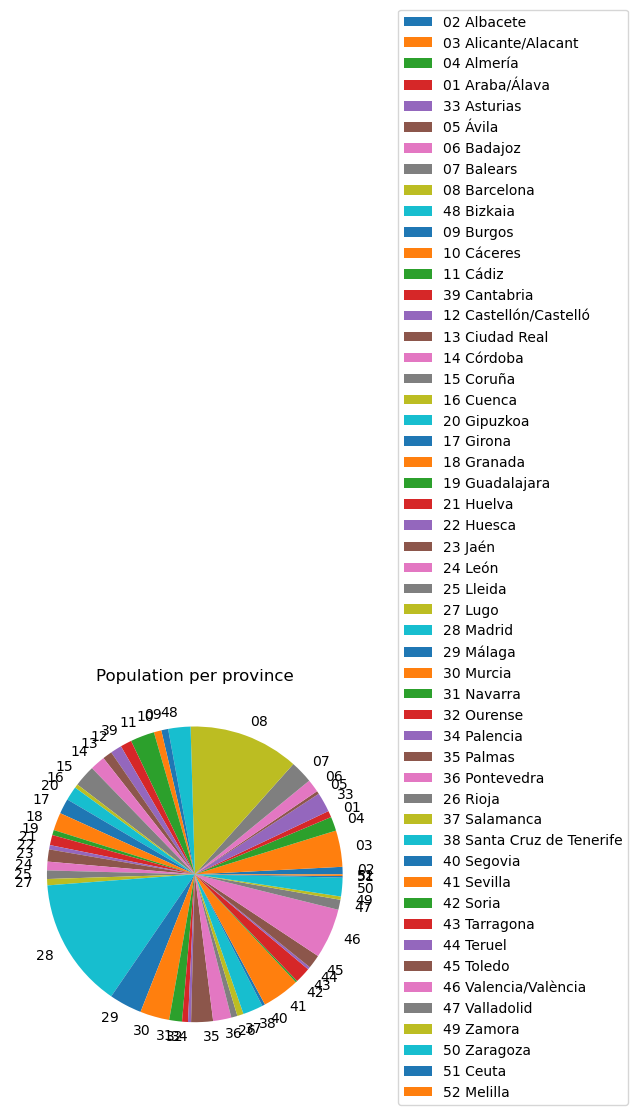

In [46]:
fig, ax = plt.subplots()
ax.pie(population_provinces_2021_list, labels=zip_codes)
ax.set_title("Population per province")
ax.legend(labels=provinces_names, bbox_to_anchor=(1.2,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)

#### Pie chart that displays the population in every Spanish province

### Prediction of the population in the province of Seville, is the growth linear?

We have to transform our data to get an array with the values for x and for y that we can use for our model

In [47]:
seville_population_list_regression = copy.deepcopy(seville_population_list)
del seville_population_list_regression[1]
print(seville_population_list_regression)

[1705320, 1714845, 1725482, 1734917, 1747441, 1758720, 1782862, 1792420, 1813908, 1835077, 1849268, 1875462, 1900224, 1917097, 1928962, 1938974, 1942155, 1941355, 1941480, 1939775, 1939527, 1939887, 1942389, 1950219, 1947852]


In [48]:
years_list_regression = copy.deepcopy(years_list)
del years_list_regression[1]
print(years_list_regression)

[1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


We have the correct values for axis x (years) and y (population). Now we turn them into the correct format. X needs to be a numpy array and then use reshape so it becomes a matrix of one columns and as many rows as provinces (method "fit" from LinearRegression needs this format). Finally, we turn also "y" into a numpy array

In [49]:
x = np.array(years_list_regression).reshape((-1, 1))

In [50]:
y = np.array(seville_population_list_regression)

Now we have the data we need. Then, we create the model. In order to do so, we call LinearRegression and run the method fit which returns the model as an object

In [51]:
model = LinearRegression().fit(x, y)

We can get the coeficiente de determinación (R2)

In [52]:
r_sq = model.score(x, y)

In [53]:
print(r_sq)

0.9034196126035285


It's 0.9, so it is good enough

Next step is to get the data in axis "x" (years) to predict what the population would be in the relation between years and population was linear. We add several more years so we can make predictions

In [54]:
x_pred = np.append(x, [e for e in range(2022, 2031)])
print(x_pred)
x_pred = x_pred.reshape((-1, 1))

[1996 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024
 2025 2026 2027 2028 2029 2030]


In [55]:
y_pred = model.predict(x_pred)

In [56]:
print(y_pred)

[1711602.18427726 1734537.76077768 1746005.54902789 1757473.33727811
 1768941.12552832 1780408.91377853 1791876.70202874 1803344.49027895
 1814812.27852916 1826280.06677937 1837747.85502958 1849215.64327979
 1860683.43153001 1872151.21978022 1883619.00803043 1895086.79628064
 1906554.58453085 1918022.37278106 1929490.16103128 1940957.94928149
 1952425.7375317  1963893.52578191 1975361.31403212 1986829.10228233
 1998296.89053254 2009764.67878275 2021232.46703297 2032700.25528318
 2044168.04353339 2055635.8317836  2067103.62003381 2078571.40828402
 2090039.19653424 2101506.98478444]


Finally, let's display the real population data as a scatterplot and the estimation as a linear function

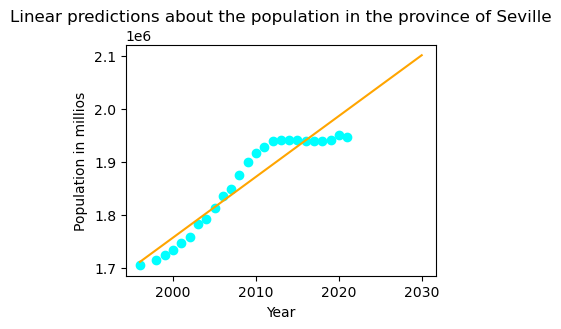

In [57]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y, color = "cyan")
ax.plot(x_pred, y_pred, color = "orange")
ax.set_xlabel('Year')
ax.set_ylabel('Population in millios')
ax.set_title("Linear predictions about the population in the province of Seville")

ax.axis('tight')

plt.show()